# **Healthcare Operations and Patient Outcome Analytics**

## **Overview**

Healthcare providers face significant challenges in optimizing hospital operations and improving patient outcomes. This project leverages machine learning to tackle these challenges, offering predictive insights and actionable solutions for hospital resource management, test result prioritization, and patient segmentation.

By focusing on key predictive models such as **Length of Stay Prediction**, **Test Results Outcome Prediction**, and **Patient Clustering**, this project demonstrates how data-driven approaches can transform healthcare operations and enhance patient care.

## **Importing Libraries**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## **Loading Dataset**

In [3]:
healthcare = pd.read_csv("../data/raw/healthcare_dataset.csv")

In [4]:
healthcare.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


## **Data Preprocessing**

### **Normalizing Text Fields**

In [5]:
text_columns = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
                'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

for col in text_columns:
    healthcare[col] = healthcare[col].str.strip().str.lower().str.title()

### **Converting Dates to Datetime and Calculating Length of Stay**

In [6]:
healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'])
healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'])

#### **Calculating Length of Stay**

In [7]:
healthcare['Length of Stay'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days

### **Checking Null Values**

In [8]:
print(healthcare.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64


### **Handling Missing Values**

In [9]:
healthcare = healthcare.dropna(subset=['Date of Admission', 'Discharge Date'])

In [10]:
categorical_columns = ['Doctor', 'Hospital', 'Insurance Provider']

# Fill missing values without inplace=True
for col in categorical_columns:
    healthcare[col] = healthcare[col].fillna(healthcare[col].mode()[0])


## **Visualization**

### **Distribution of Length of Stay**

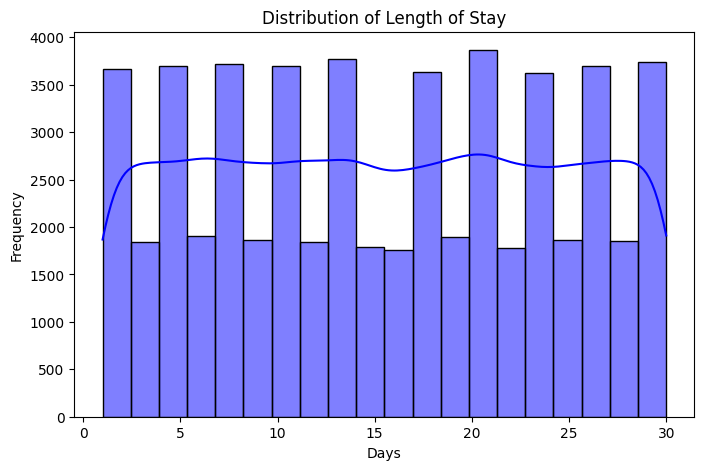

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(healthcare['Length of Stay'], kde=True, bins=20, color='blue')
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

### **Gender Distribution**

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_13948\4176781700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=healthcare, palette='pastel')


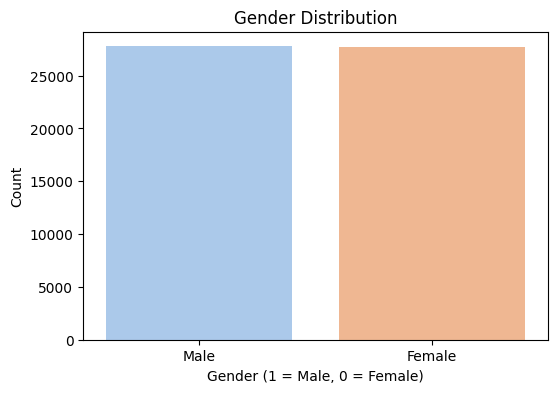

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=healthcare, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.show()

### **Most Common Medical Conditions**

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_13948\1600345143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=condition_counts.index, x=condition_counts.values, palette='muted')


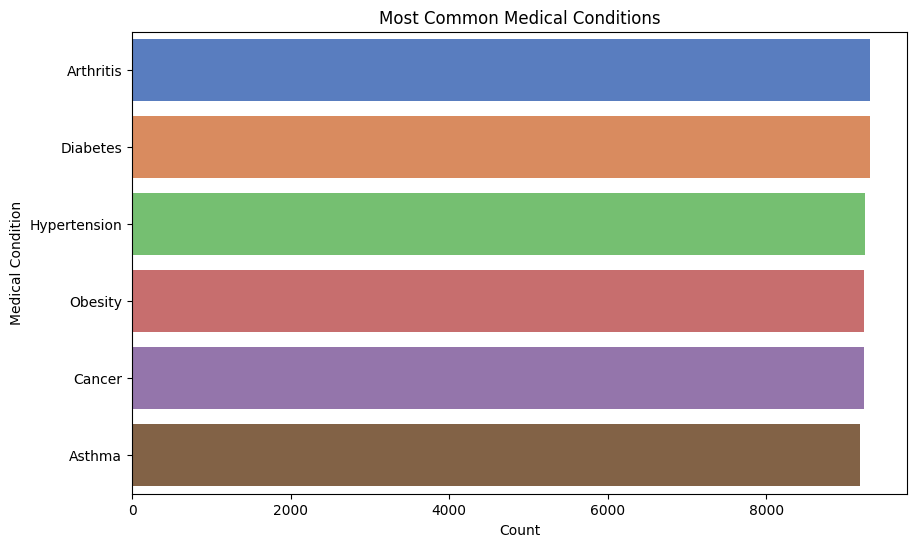

In [15]:
plt.figure(figsize=(10, 6))
condition_counts = healthcare['Medical Condition'].value_counts()
sns.barplot(y=condition_counts.index, x=condition_counts.values, palette='muted')
plt.title("Most Common Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Medical Condition")
plt.show()

### **Billing Amount vs. Length of Stay**

c:\Users\NIHAL\Documents\GitHub\Predictive-Healthcare-Analytics-Insights-and-Forecasts-from-Patient-Data\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


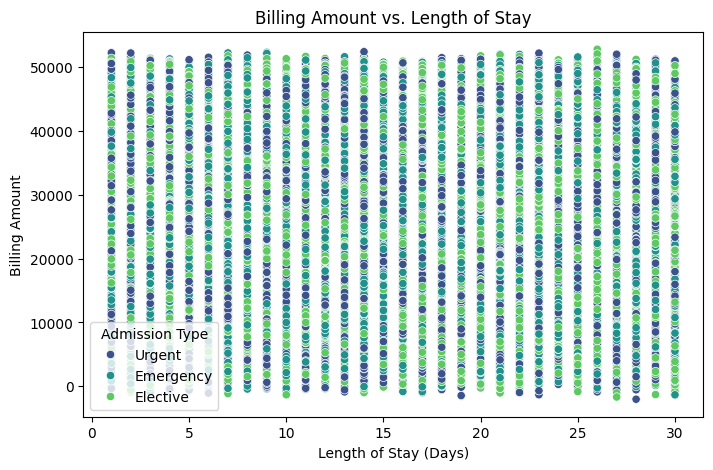

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Length of Stay', y='Billing Amount', hue='Admission Type', data=healthcare, palette='viridis')
plt.title("Billing Amount vs. Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Billing Amount")
plt.legend(title="Admission Type")
plt.show()